In [ ]:
## PROBLEM---STATEMENT
# A stock price always fluctuates, but is there a relation between a closing price and its moving averages? 
# An analyst wants to showcase how the stock would move, he has 5 years of stock price data with him on which he needs to perform the analysis.

## OBJECTIVE
# Find the possible futuristic movement of the stock 'GOOG" based on its price for the last 5 years.

## Perform the following steps:
# 1. Get 5 years of data from Finance Package with Ticker Symbol 'GOOG 
# 2. Create 50DMA and 200DMA
# 3. Plot it with the Actual Price.
# 4. Basic EDA on the Data. 
# 5. Fit Statsmodel OLS to find the best possible features

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('drug_sale.csv')

In [63]:
df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,01/01/2022,1.366664,1.100981,7.738969,4.861829,2.489877,6.574266,2.062177,5.249451,31222,24885,7203,35274,31381,12606,32714,696
1,02/01/2022,7.794736,4.794366,2.084555,9.979314,7.163807,3.472814,7.773259,2.360589,31873,45756,36532,28233,725,7337,11586,34855
2,03/01/2022,9.712900,8.247970,3.629151,2.955079,3.731727,8.722405,8.045228,5.830798,16424,30720,41167,10886,27157,15934,45173,36066
3,04/01/2022,4.874432,5.187726,7.401177,2.499761,8.739375,9.809653,1.766773,3.192157,27102,20761,36249,47660,24970,28865,30514,28364
4,05/01/2022,8.715127,3.668150,5.708166,1.857397,5.003449,3.378617,9.410967,4.363888,30245,37685,44547,37273,37368,16063,18567,29828


In [64]:
df.shape

(30, 17)

In [65]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

In [66]:
df.tail()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2022-01-26,3.762420,2.428306,5.086072,7.368002,6.819581,3.201409,3.253430,2.218368,12024,39680,1715,956,6607,31804,26400,48506
2022-01-27,8.747625,4.744388,3.538672,8.226157,6.453624,9.138567,3.808627,7.269261,311,33583,49328,49935,33829,14437,17703,30928
2022-01-28,5.434866,4.790088,8.144975,5.685537,5.897621,3.306585,7.178369,4.756039,17867,45939,44871,32366,21421,14175,29322,36092
2022-01-29,5.502051,7.093283,5.457580,4.060733,5.298365,7.338932,5.231197,1.206058,34390,30196,15936,43801,11139,15754,28181,27310
2022-01-30,6.773672,8.663792,9.244658,6.853692,1.644267,9.725153,8.752681,3.292125,34197,10275,7014,2331,40591,36850,44156,16925


# Check for Distribution & Skewness using plots

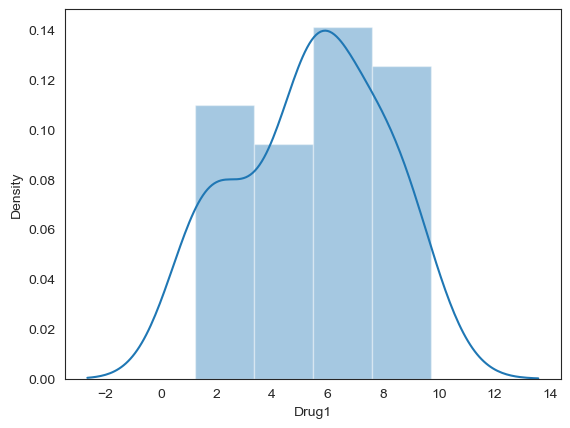

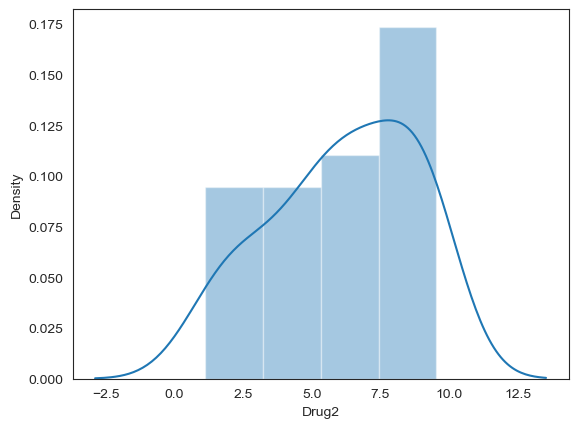

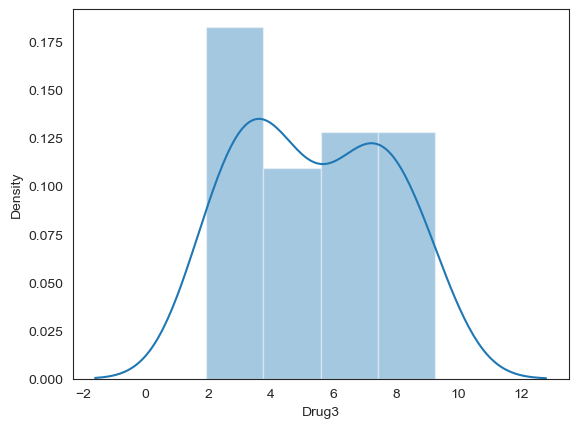

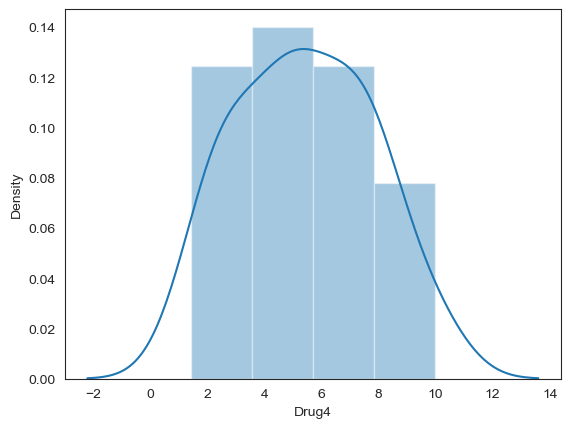

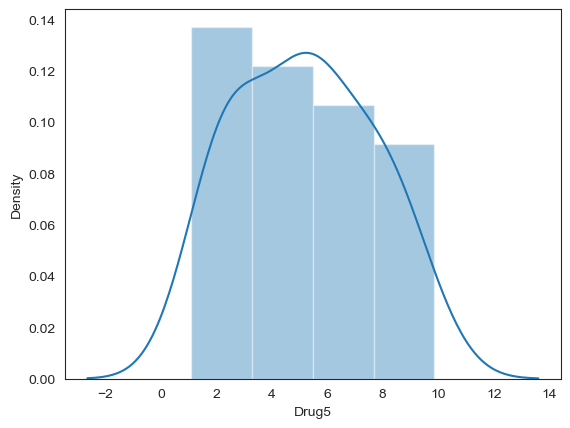

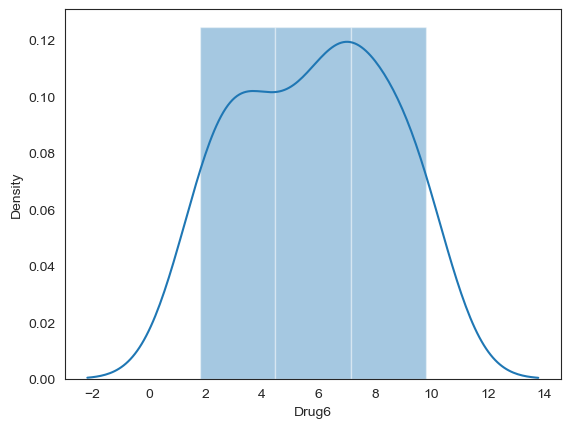

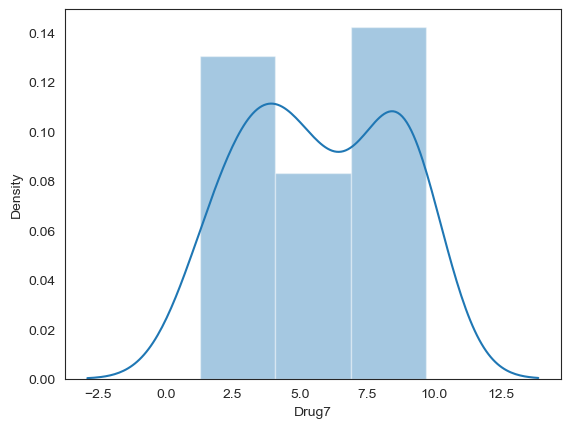

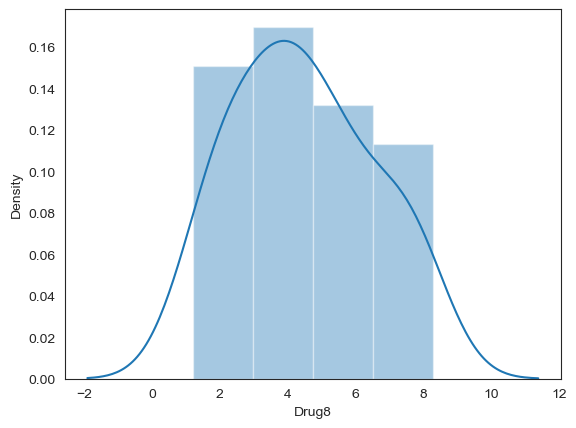

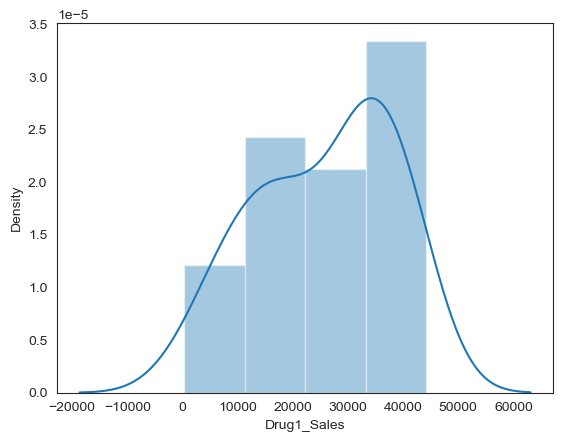

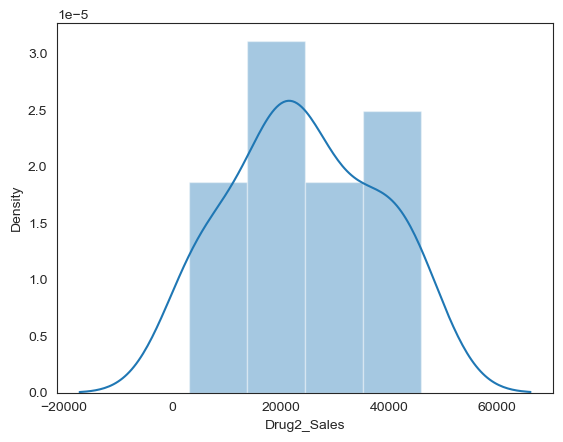

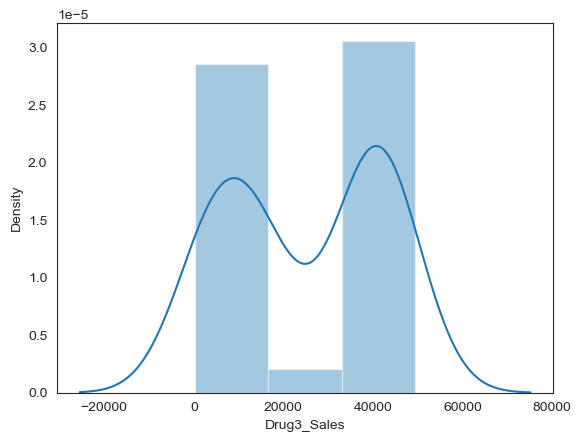

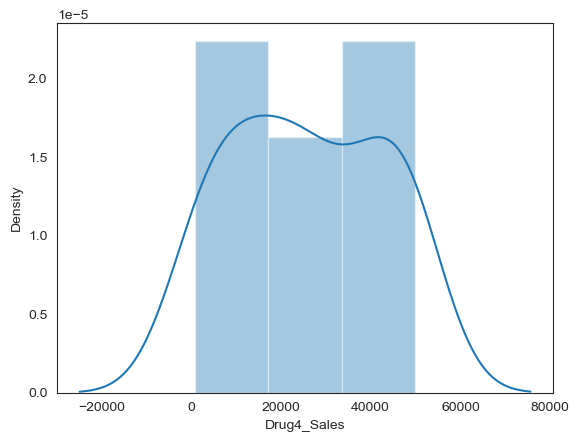

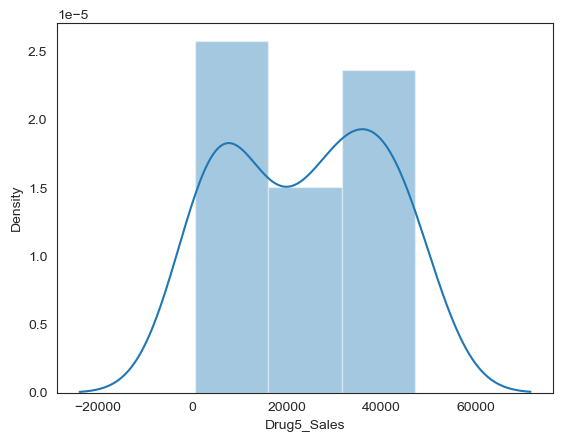

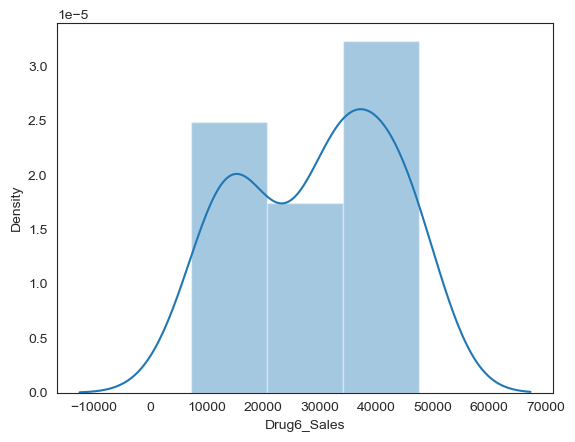

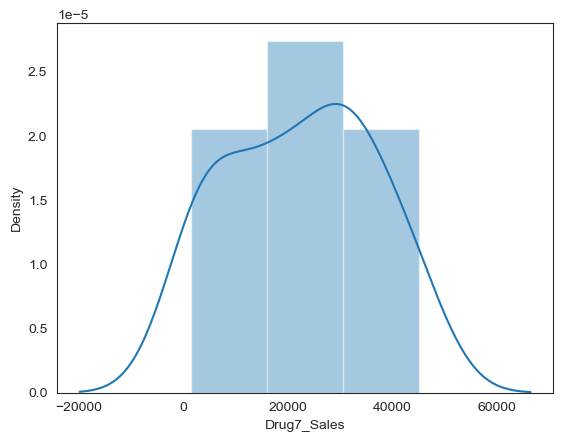

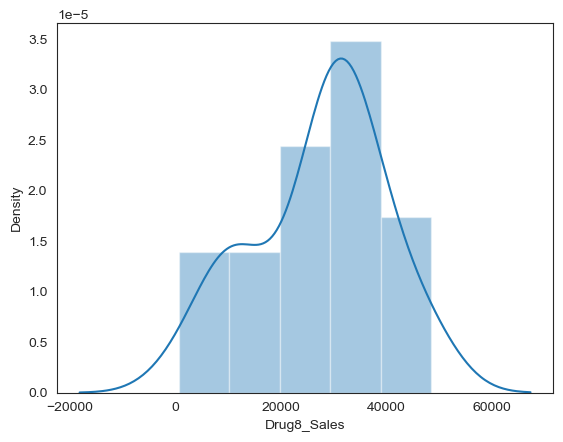

In [67]:
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

In [56]:
# describing the data
df.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.398171,6.126987,5.380192,5.416151,5.155780,5.836178,5.731060,4.455654,25730.666667,24425.133333,25098.433333,25732.933333,23813.600000,29449.700000,22404.133333,27316.533333
std,2.541450,2.626308,2.335277,2.381460,2.468016,2.613993,2.753779,2.052744,12468.048185,13303.317133,16980.142548,16887.359067,16122.161262,13003.780363,13986.618969,12417.633215
min,1.210703,1.100981,1.941686,1.414474,1.104161,1.791449,1.269358,1.206058,311.000000,3141.000000,324.000000,819.000000,629.000000,7337.000000,1415.000000,696.000000
25%,3.571733,4.755813,3.561292,3.476949,2.768389,3.402166,3.666654,2.953653,15626.750000,16746.000000,7742.250000,11623.500000,7338.500000,15966.250000,9248.250000,18504.250000
50%,5.528557,6.596006,5.271826,5.164000,5.067009,6.367201,5.662919,4.181924,28673.500000,22985.000000,27524.000000,25001.000000,26063.500000,32041.500000,22875.000000,29555.000000
75%,7.419495,8.559837,7.340158,7.292858,7.077751,7.601373,8.602931,5.900338,35043.250000,36659.500000,40987.000000,41365.500000,38415.750000,39789.000000,32288.250000,34640.000000
max,9.712900,9.546048,9.244658,9.979314,9.855408,9.809653,9.706541,8.276068,44153.000000,45939.000000,49328.000000,49936.000000,47144.000000,47522.000000,45173.000000,48506.000000


# Inference from the describe function:

1. Most number of units sold were of Drug4 
2. Least number of units sold were of Drug2
3. Most sales happened with Drug3 while Drug1 contributed the least.
4. Even though Drug2 sold a max of 9.5 units, it generated 45939 worth revenue, implying that the price of each drug is not same

In [68]:
import numpy as np

In [69]:
np.mean(df['Drug1_Sales']/df['Drug1'])

6827.291377169074

In [70]:
drugs = ['Drug'+str(x) for x in range(1,9)]
for drug in drugs:
    print(drug,end = '---')    
    print(np.mean(df[drug+'_Sales']/df[drug]))

Drug1---6827.291377169074
Drug2---5893.735107048723
Drug3---6714.752708758807
Drug4---5637.974703728648
Drug5---6345.908114662876
Drug6---6605.7090572261695
Drug7---5779.180331185211
Drug8---7801.639245883395


# Inference of drug price:

1. No price fluctuation between weeks 
2. All drugs have different price.
3. Confirms our speculation that Drug8 is costly than the others. 
4. Drug8 is the costliest while Drug4 is the cheapest.

# 18DaysAnalysis

In [74]:
_18df = df.resample('W').mean()

In [75]:
_18df.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2022-01-02,1.366664,1.100981,7.738969,4.861829,2.489877,6.574266,2.062177,5.249451,31222.000000,24885.000000,7203.000000,35274.000000,31381.000000,12606.000000,32714.000000,696.000000
2022-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-16,5.467851,7.822903,5.783920,3.633007,5.533984,5.481840,5.323240,4.078221,22960.750000,21481.750000,26343.750000,20397.250000,14612.250000,31775.500000,21784.250000,25642.000000
2022-01-23,4.561318,7.199897,4.371779,6.393217,4.733455,5.912134,5.969866,5.165097,26894.428571,16547.571429,26014.857143,23250.142857,20549.285714,32853.285714,12887.142857,25998.714286
2022-01-30,4.747880,5.359646,6.167247,6.194954,5.555369,5.479748,5.017317,4.052474,22065.714286,35335.142857,18551.857143,28515.714286,23766.857143,28140.428571,28193.285714,34536.857143


In [76]:
_18df.tail()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2022-11-06,5.237598,5.721187,3.246231,5.423102,7.535256,6.607492,1.428626,3.412812,41057.0,5980.0,20226.0,20029.0,47122.0,13389.0,43195.0,33995.0
2022-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04,5.475668,9.029597,2.279629,2.308055,2.978991,7.631366,8.637504,4.041493,41045.0,26041.0,44002.0,14351.0,38765.0,47472.0,4295.0,6721.0


In [77]:
_18df.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,5.979092,5.665576,5.387990,5.070432,5.089234,6.019236,6.002599,4.408635,27285.126190,23800.830952,27101.430952,26680.073810,26978.292857,28146.814286,24019.245238,25290.438095
std,2.188596,2.693275,2.322542,2.325302,2.361827,1.943751,3.077506,1.552538,9073.570668,11019.674462,15120.931027,14184.998611,12813.096915,13300.752393,14171.247826,12541.318116
min,1.366664,1.100981,2.084555,1.857397,2.489877,2.682185,1.269358,2.153331,11536.000000,3141.000000,2029.000000,819.000000,725.000000,7337.000000,4295.000000,696.000000
25%,4.811156,4.231258,3.437691,3.166261,2.838590,5.129958,3.539747,3.541653,21800.857143,20556.500000,17074.928571,17190.000000,22158.071429,15998.500000,12236.571429,18333.000000
50%,5.475668,5.721187,5.708166,4.881237,5.003449,6.160137,6.184051,4.078221,27102.000000,21937.000000,26343.750000,24589.000000,28132.000000,28865.000000,21784.250000,29765.000000
75%,7.697018,7.874248,7.279140,6.636745,6.359588,6.797860,8.568359,5.207274,32118.000000,28380.500000,40807.000000,36273.500000,35690.500000,37868.142857,35163.500000,34265.928571
max,9.712900,9.057701,9.047463,9.979314,9.855408,9.809653,9.597705,8.276068,41057.000000,45756.000000,44547.000000,48421.000000,47122.000000,47472.000000,45173.000000,42875.000000


# Inference from the describe function of 18Days analysis:

1. Most number of units sold were of Drug4
2. Least number of units sold were of Drug2
3. Most sales happened with Drug4 while Drug5 contributed the least.
4. Even though Drug2 sold a max of 9 units, it generated 41057 worth revenue, implying that the price of each drug is not same

<BarContainer object of 49 artists>

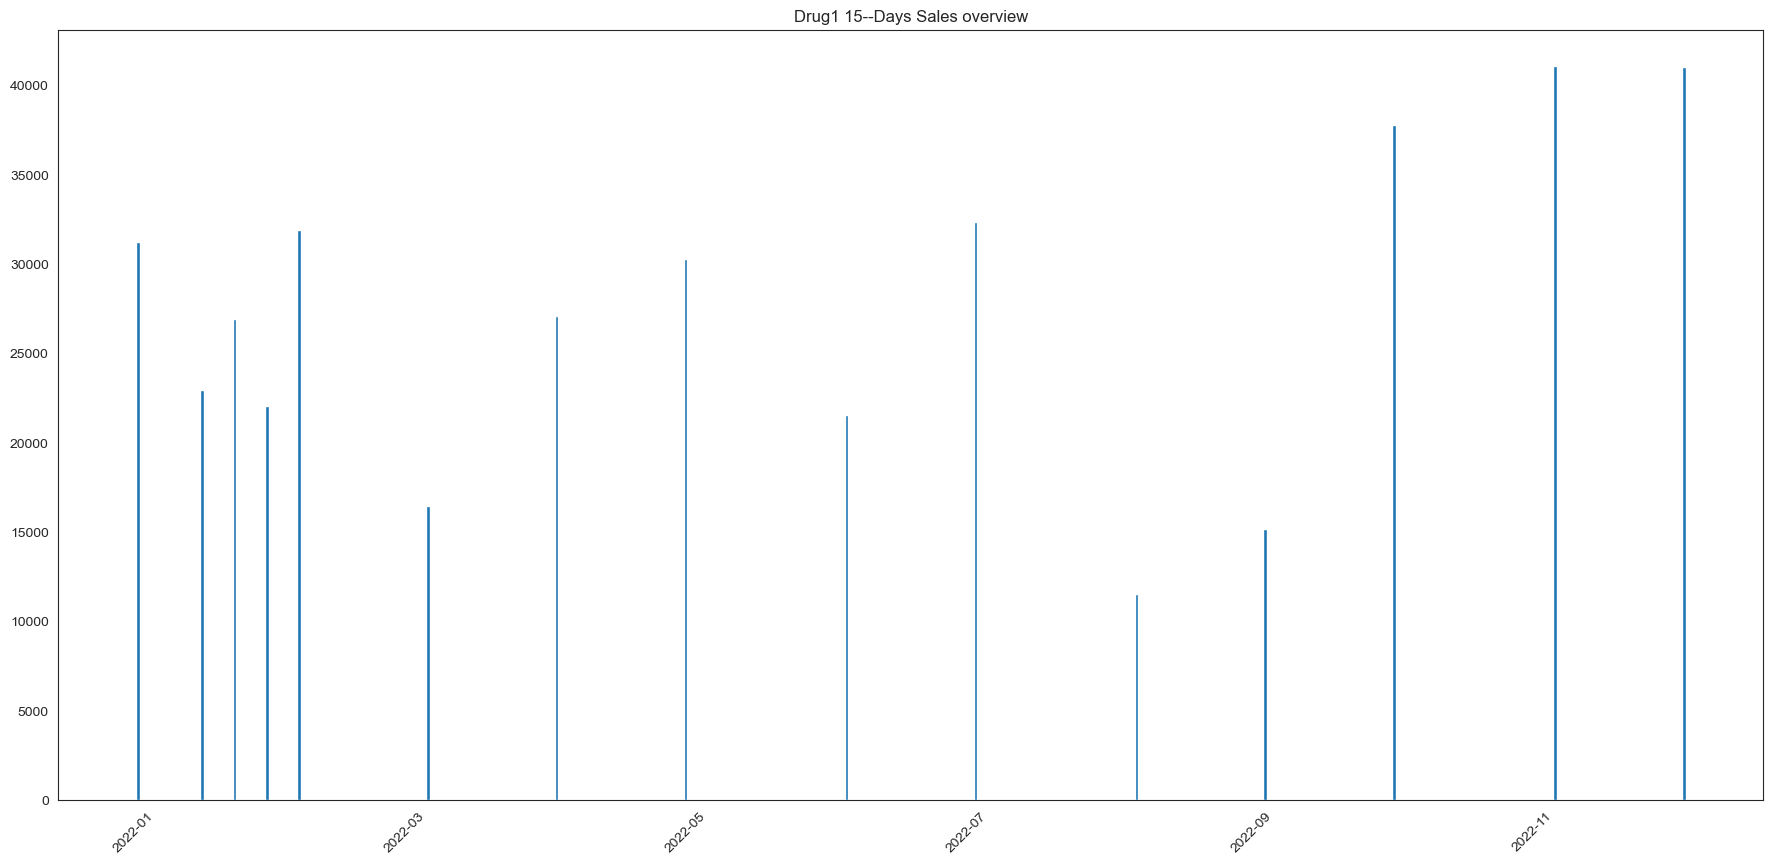

In [79]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug1 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug1_Sales)

# Inferences of Drug1 15--Days sales
1. Best 15 days were from 11/2022
2. Sales pick up gradually with hiccups and topped at 11/2022  
3. From 1st day of jan to day 15 there is increased in seales.

<BarContainer object of 49 artists>

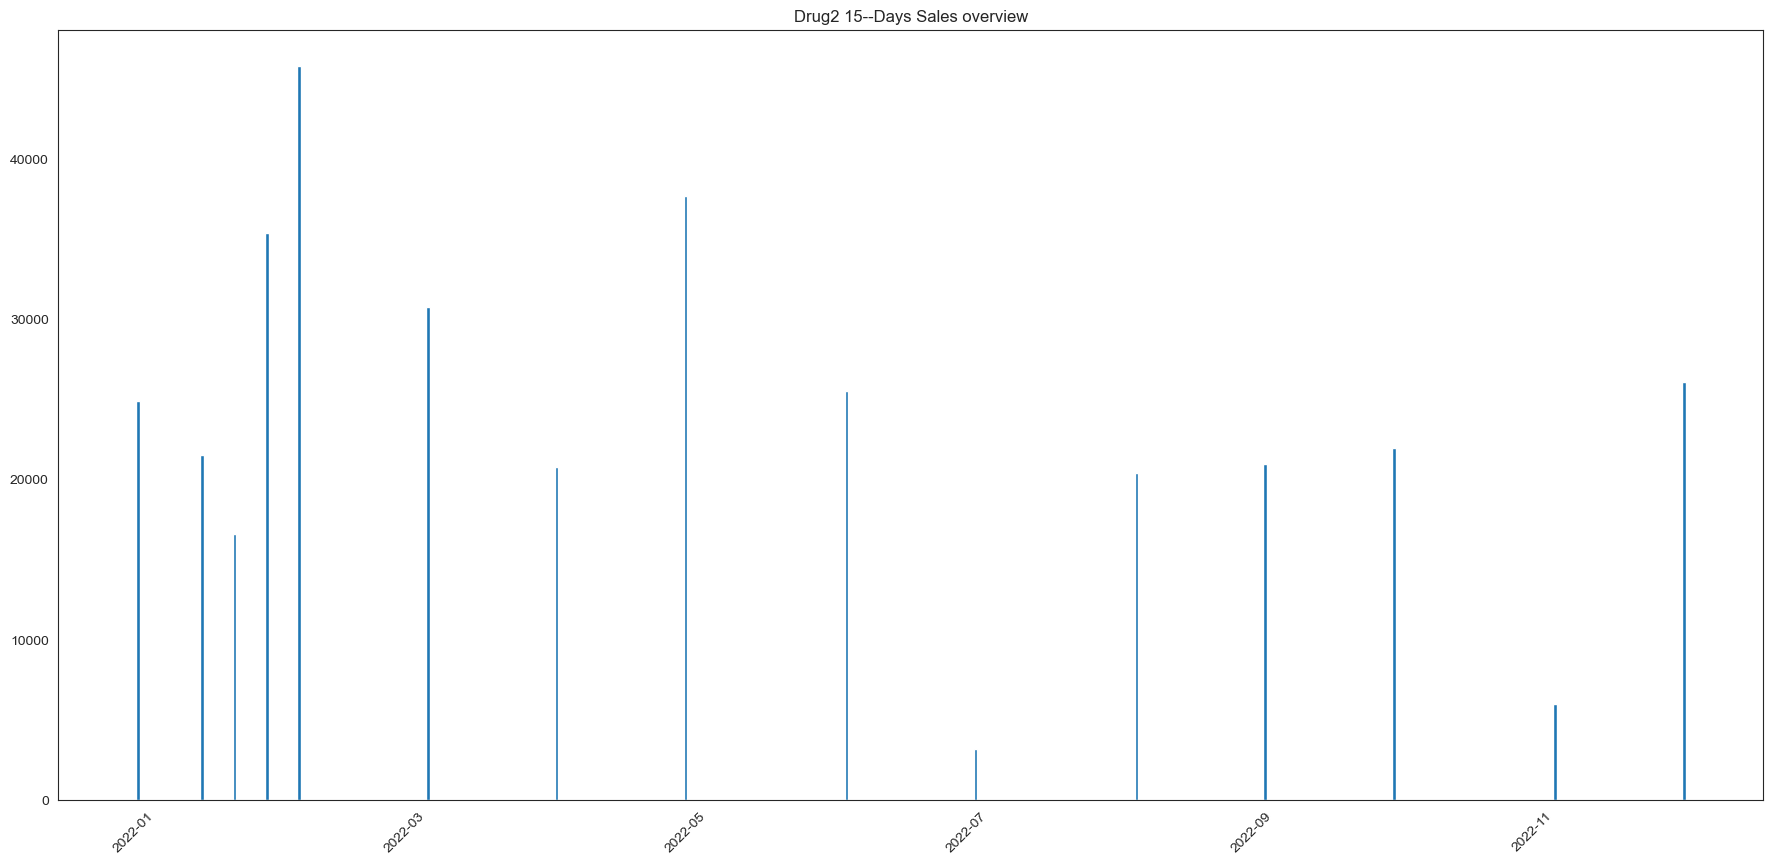

In [80]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug2 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug2_Sales)

<BarContainer object of 49 artists>

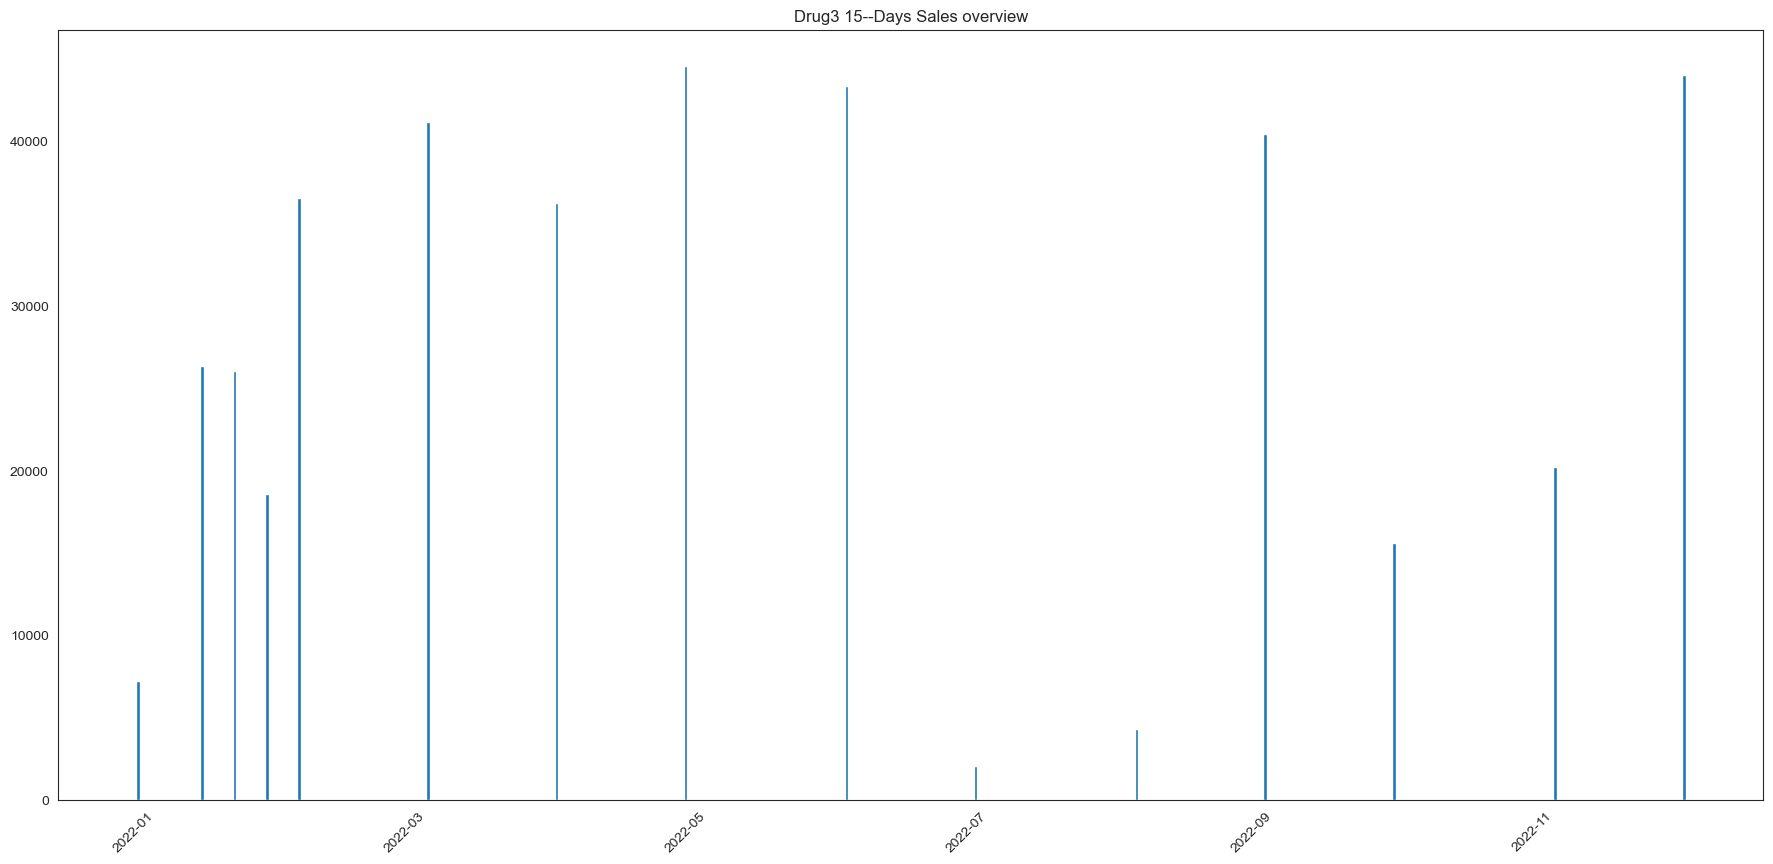

In [81]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug3 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug3_Sales)

<BarContainer object of 49 artists>

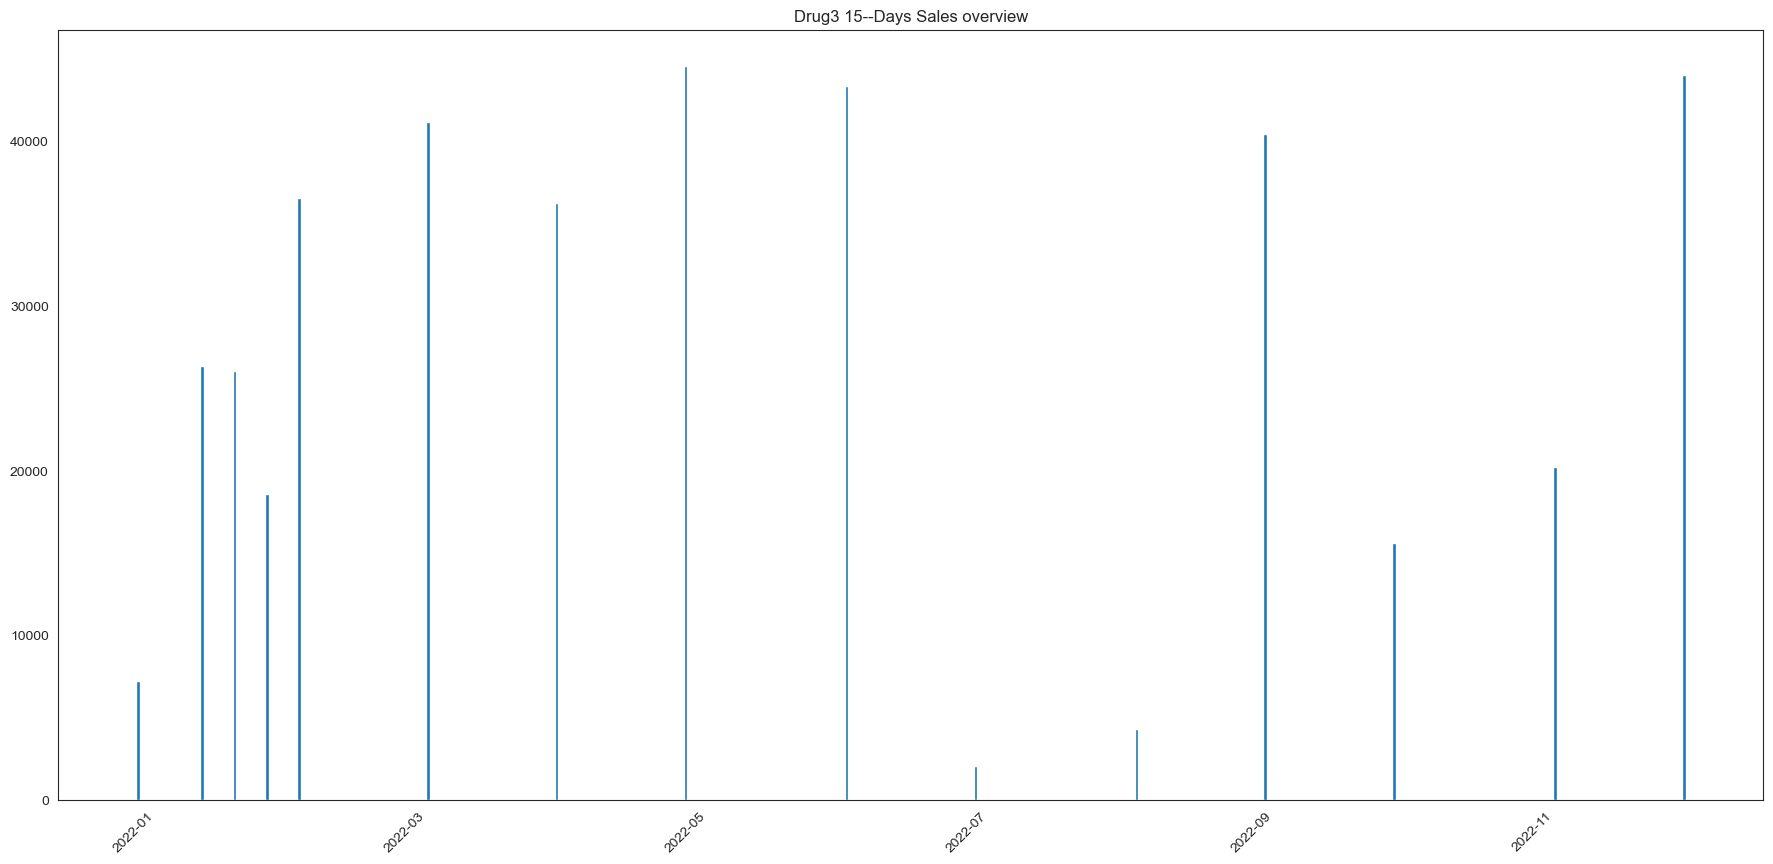

In [82]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug3 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug3_Sales)


<BarContainer object of 49 artists>

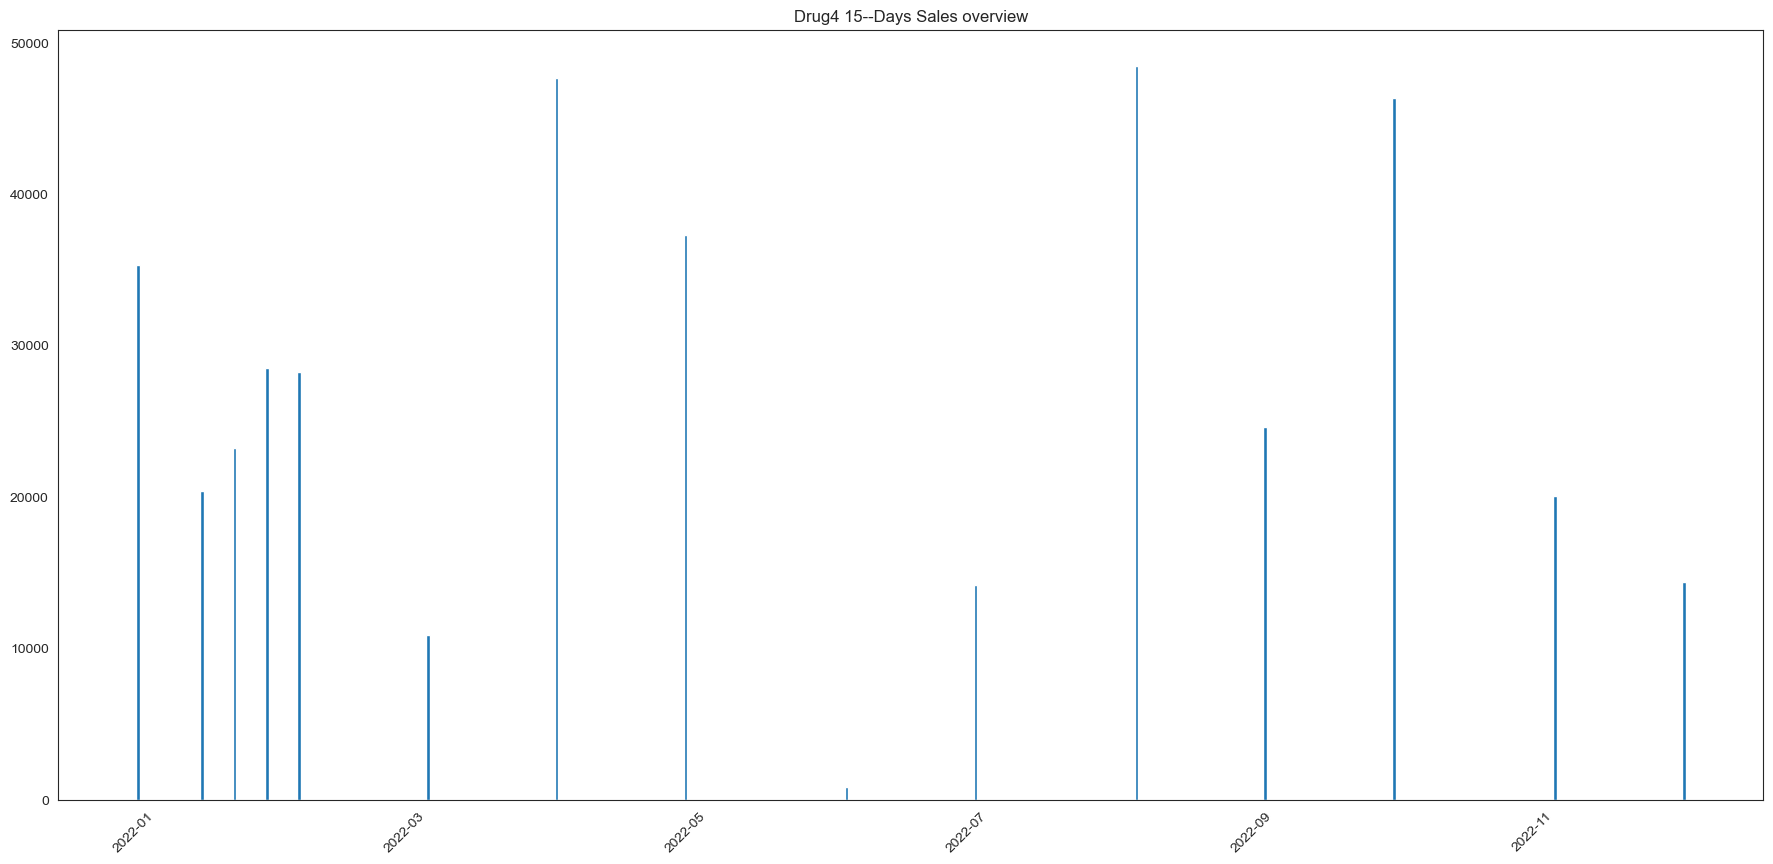

In [83]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug4 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug4_Sales)

<BarContainer object of 49 artists>

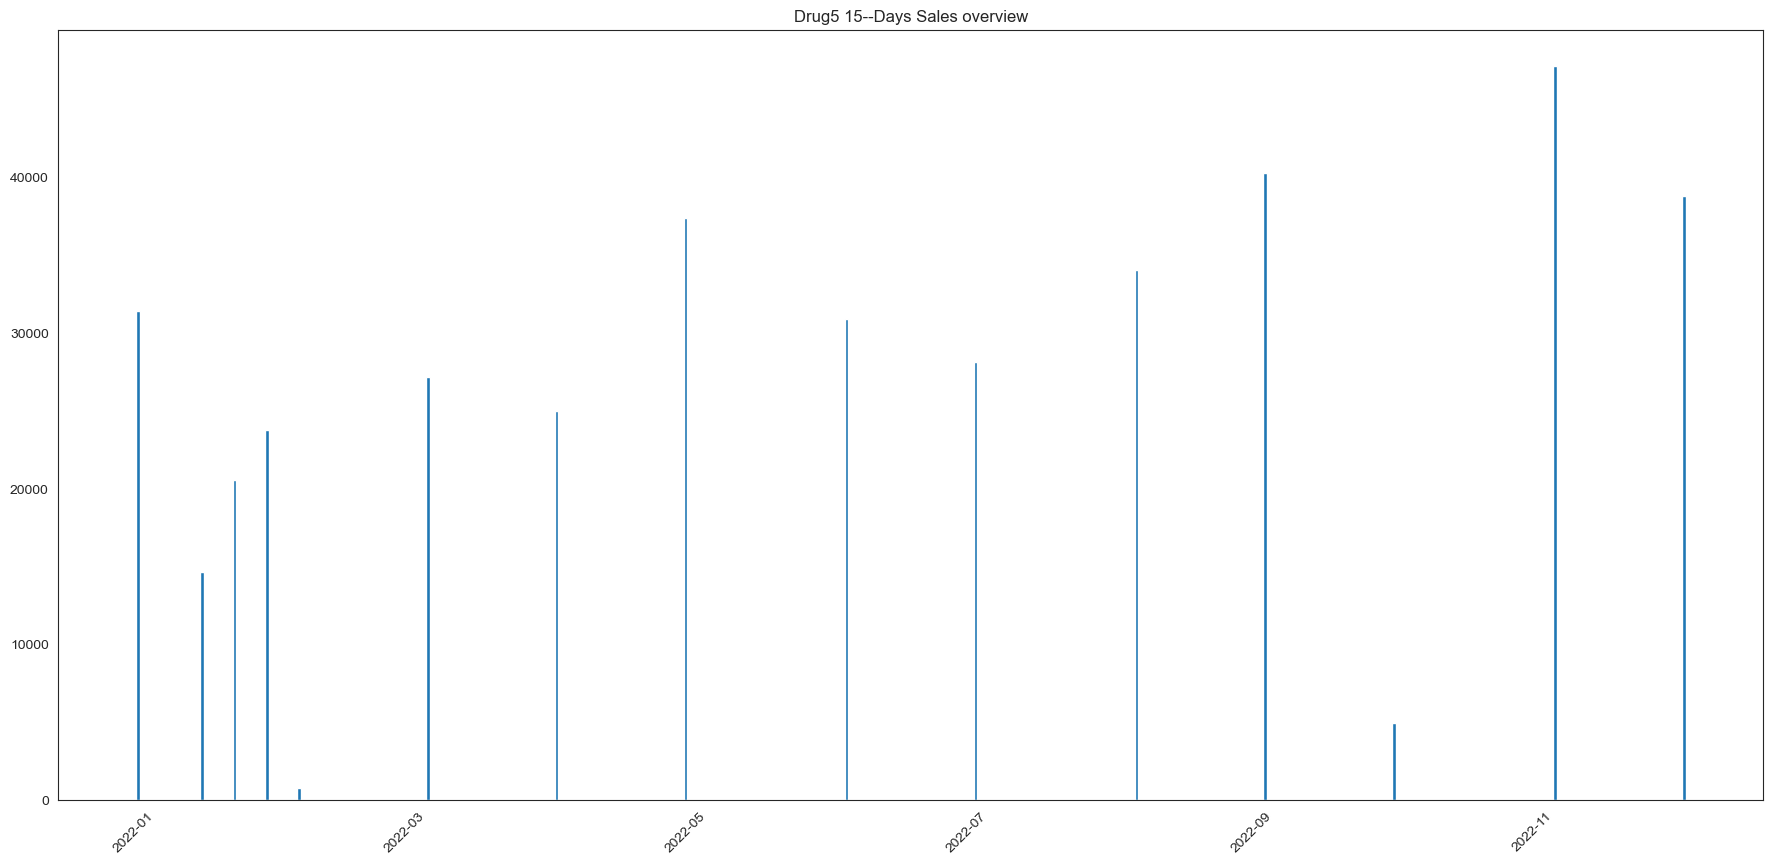

In [84]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug5 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug5_Sales)

<BarContainer object of 49 artists>

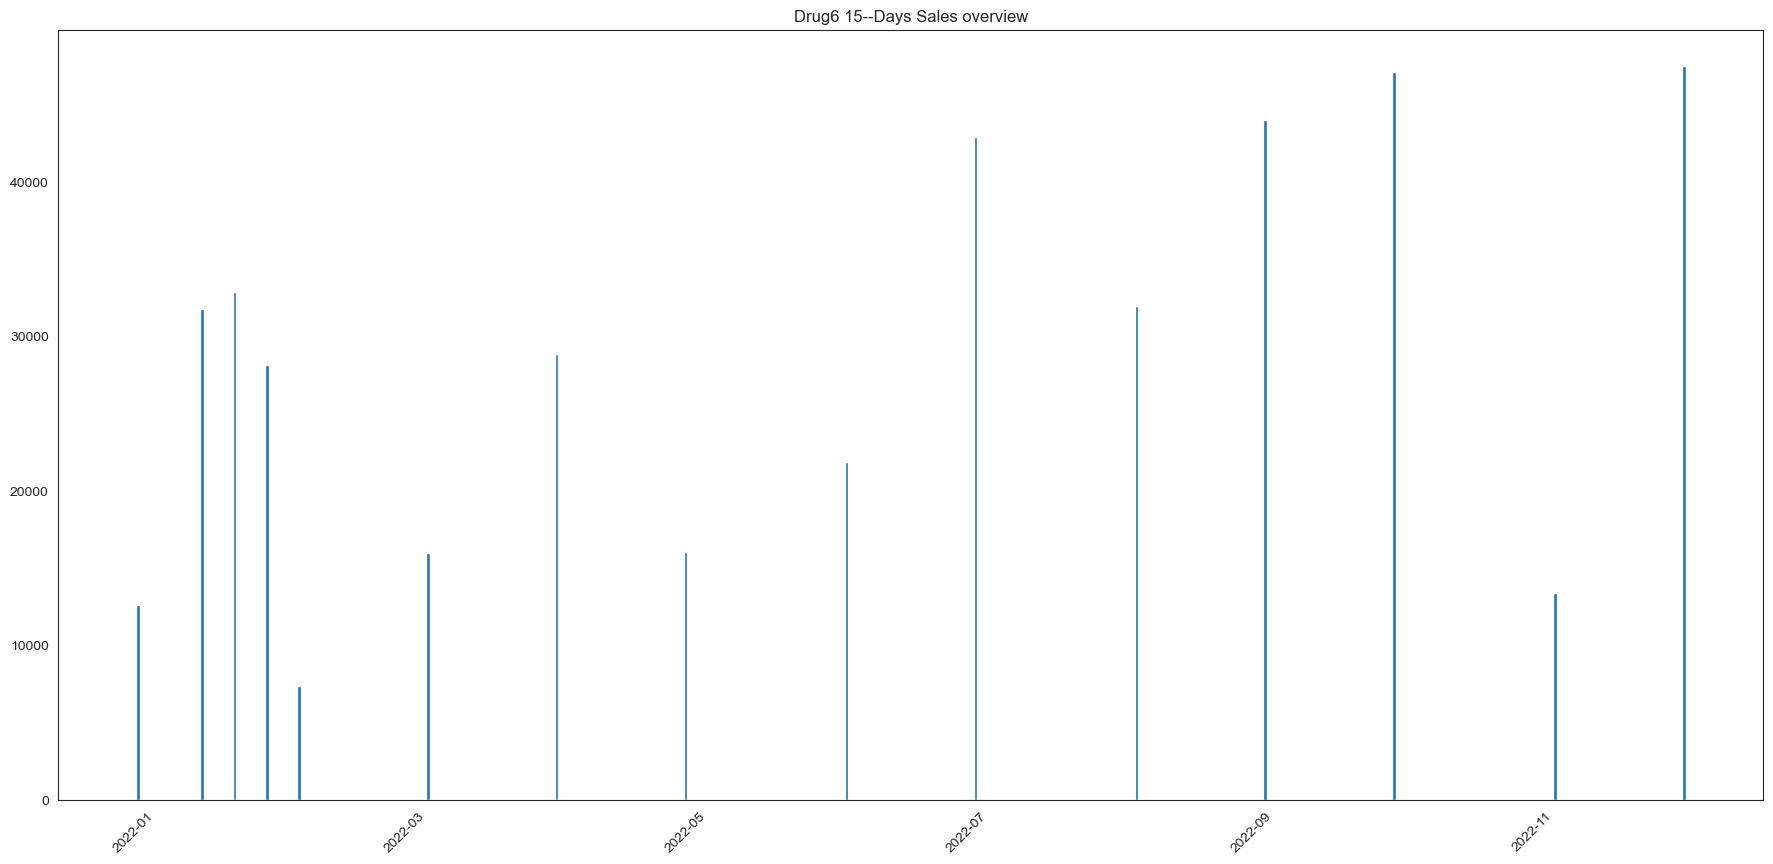

In [85]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug6 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug6_Sales)

<BarContainer object of 49 artists>

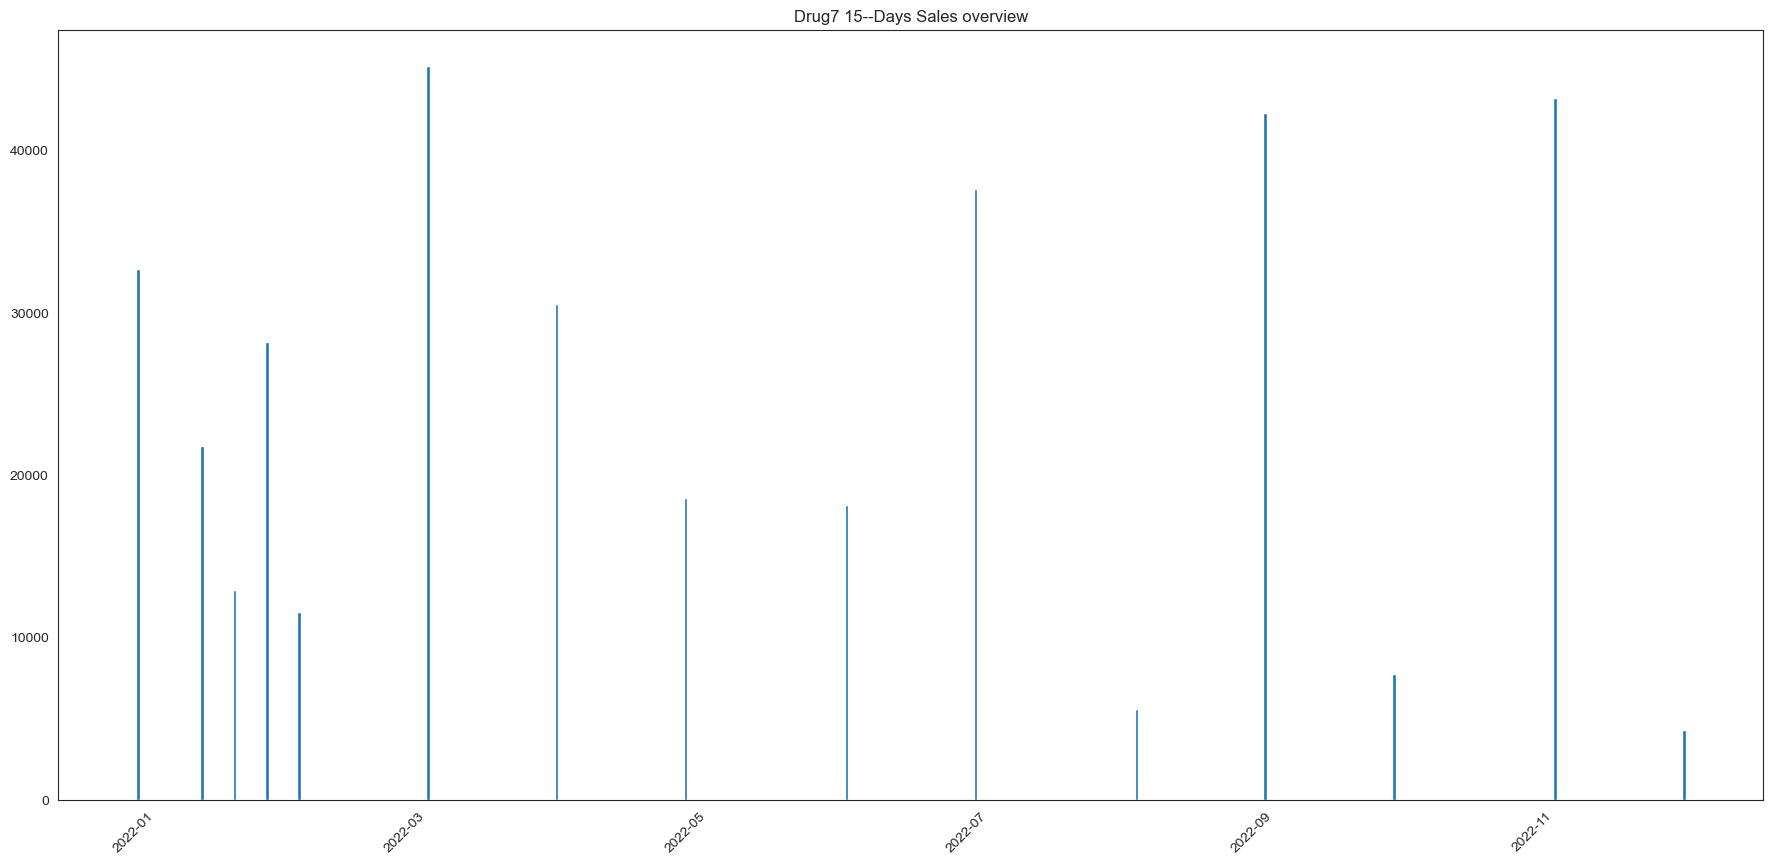

In [86]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug7 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug7_Sales)

<BarContainer object of 49 artists>

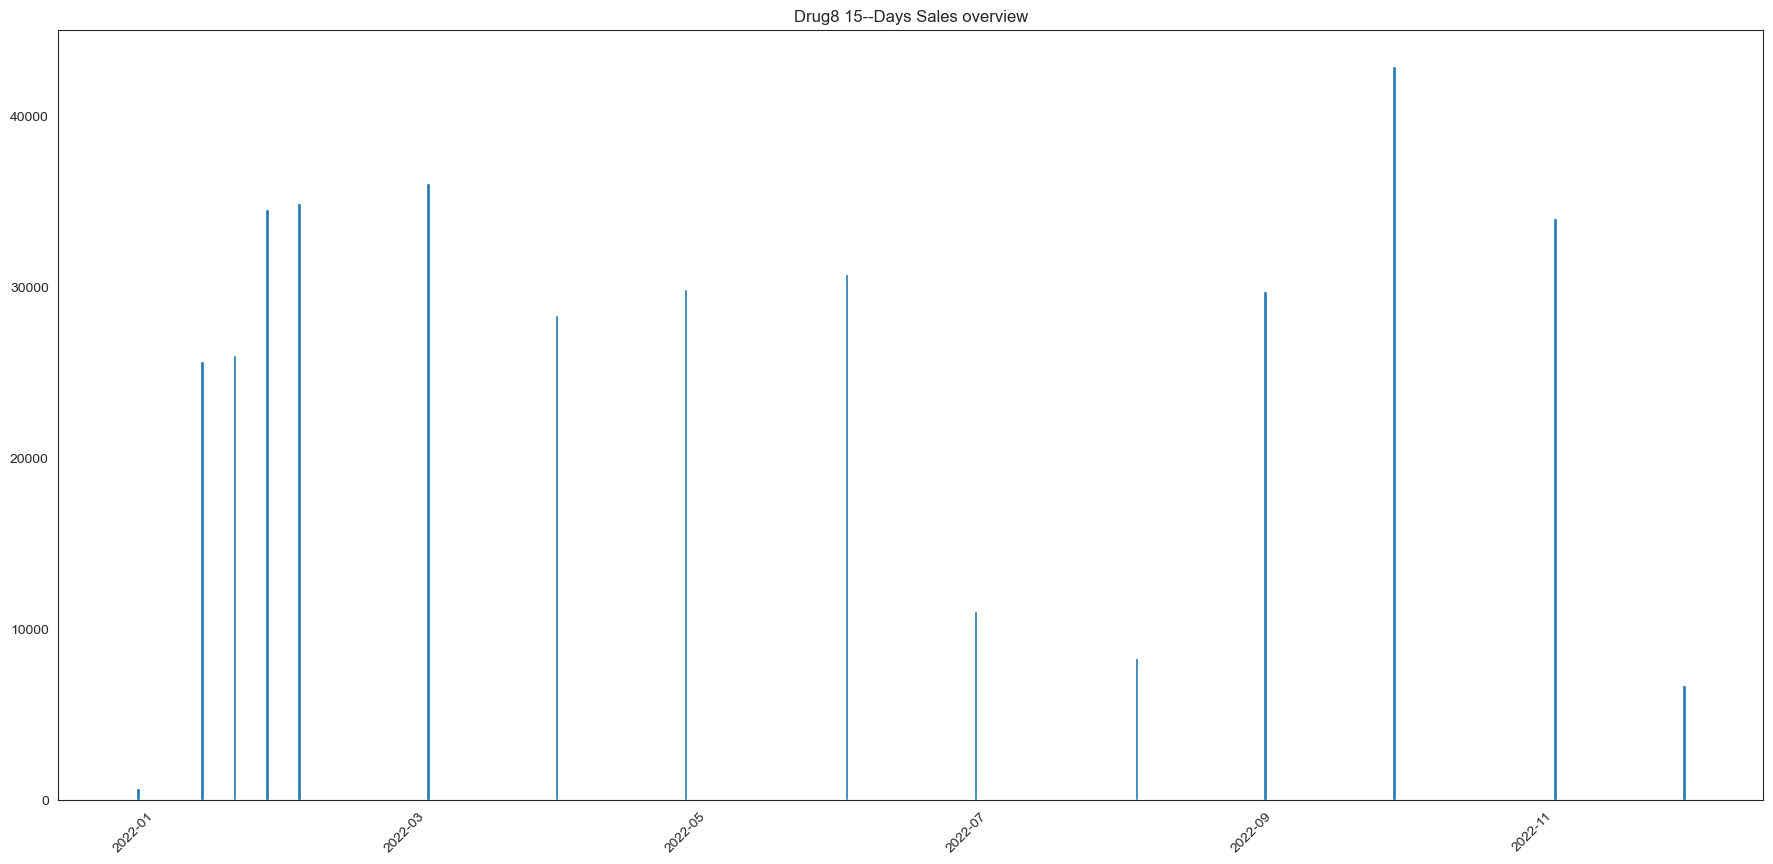

In [87]:
plt.figure(figsize = (22,10),dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug8 15--Days Sales overview')
plt.bar(x = _18df.index, height = _18df.Drug8_Sales)

# Monthly Analysis

In [88]:
mdf = df.resample('M').mean()

In [89]:
mdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2022-01-31,4.652761,6.332073,5.507781,5.658476,5.086715,5.697095,5.277127,4.530807,24515.052632,24946.894737,22344.473684,25222.315789,21054.894737,29824.421053,21442.842105,27737.526316
2022-02-28,7.794736,4.794366,2.084555,9.979314,7.163807,3.472814,7.773259,2.360589,31873.000000,45756.000000,36532.000000,28233.000000,725.000000,7337.000000,11586.000000,34855.000000
2022-03-31,9.712900,8.247970,3.629151,2.955079,3.731727,8.722405,8.045228,5.830798,16424.000000,30720.000000,41167.000000,10886.000000,27157.000000,15934.000000,45173.000000,36066.000000
2022-04-30,4.874432,5.187726,7.401177,2.499761,8.739375,9.809653,1.766773,3.192157,27102.000000,20761.000000,36249.000000,47660.000000,24970.000000,28865.000000,30514.000000,28364.000000
2022-05-31,8.715127,3.668150,5.708166,1.857397,5.003449,3.378617,9.410967,4.363888,30245.000000,37685.000000,44547.000000,37273.000000,37368.000000,16063.000000,18567.000000,29828.000000


In [91]:
mdf.shape

(12, 16)